In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy import units as u 
from astropy import constants as c 
import h5py
import scipy as stats

To import the HDF5 File

In [2]:
f=h5py.File('blast2012_fields_with_units.hdf5','r')

To search for specific datsets, (ex: "PSS')

In [3]:
for k in f.keys():
    if 'BAT'in k: 
        print(k)
    

I_BATT_CC1
I_BATT_CC2
T_1_BAT
T_2_BAT
VT_1_BAT
VT_2_BAT
V_BATT_CC1
V_BATT_CC2


The above sers contain the key BAT which I presume is the way BLAST 2012 named data measures at batteries. 

In [4]:
for k in f.keys():
    if 'CC'in k: 
        print(k)
    

I_ARR_CC1
I_ARR_CC2
I_BATT_CC1
I_BATT_CC2
T_HS_CC1
T_HS_CC2
V_ARR_CC1
V_ARR_CC2
V_BATT_CC1
V_BATT_CC2
V_TARG_CC1
V_TARG_CC2


CC I believe stands for charge controller. 

In [5]:
f['V_BATT_CC1']

<HDF5 dataset "V_BATT_CC1": shape (5874594,), type "<f2">

In [6]:
f['V_BATT_CC1'].attrs.keys()

<KeysViewHDF5 ['Hz_sample_rate', 'unit']>

In [7]:
f['V_BATT_CC1'].attrs.get('Hz_sample_rate')

1.0

In [8]:
f['V_BATT_CC2'].attrs.get('Hz_sample_rate')

1.0

In [9]:
f['I_BATT_CC1'].attrs.get('Hz_sample_rate')

1.0

In [10]:
f['I_BATT_CC2'].attrs.get('Hz_sample_rate')

1.0

In [11]:
f['TIME'].attrs.get('unit')

'hr'

I will plot each one of these datasets against flight time to guage an average current and voltage supplied to battery by CCs.

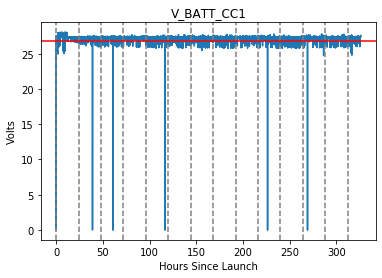

In [12]:
plt.plot(f['TIME'],f['V_BATT_CC1'])
for d in np.arange(14):
    plt.axvline(d*24, linestyle='--',color='gray')
    
plt.axhline(26.75, linestyle ='-',color='red')    
plt.title('V_BATT_CC1')  
plt.xlabel('Hours Since Launch')
plt.ylabel('Volts')
plt.show()    

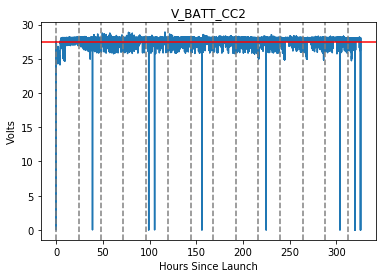

In [13]:
plt.plot(f['TIME'],f['V_BATT_CC2'])
for d in np.arange(14):
    plt.axvline(d*24, linestyle='--',color='gray')
plt.axhline(27.5, linestyle ='-',color='red')     
plt.title('V_BATT_CC2')  
plt.xlabel('Hours Since Launch')
plt.ylabel('Volts')
plt.show()  

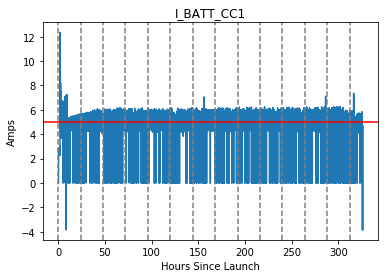

In [14]:
plt.plot(f['TIME'],f['I_BATT_CC1'])
for d in np.arange(14):
    plt.axvline(d*24, linestyle='--',color='gray')
plt.axhline(5, linestyle='-',color='red')    
plt.title('I_BATT_CC1')  
plt.xlabel('Hours Since Launch')
plt.ylabel('Amps')
plt.show()  

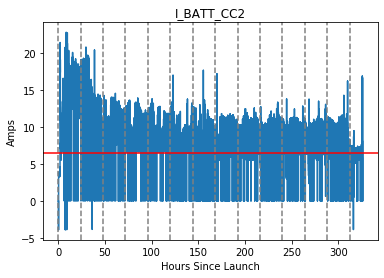

In [15]:
plt.plot(f['TIME'],f['I_BATT_CC2'])
for d in np.arange(14):
    plt.axvline(d*24, linestyle='--',color='gray')
plt.axhline(6.5, linestyle='-',color='red')    
plt.title('I_BATT_CC2')  
plt.xlabel('Hours Since Launch')
plt.ylabel('Amps')
plt.show() 

Attempting to give them names and arange them in arrays in order to multiply to get power.

In [16]:
V_B2CC1=np.array(f['V_BATT_CC1'])
V_B2CC2=np.array(f['V_BATT_CC2'])
I_B2CC1=np.array(f['I_BATT_CC1'])
I_B2CC2=np.array(f['I_BATT_CC2'])

To get a power (P=IV) array for the first charge controller; This might take a long time to run. Have not been able to run this.

In [17]:
P_B2CC1=np.multiply(V_B2CC1,I_B2CC1)
P_B2CC1

array([   0.  ,    0.  ,    0.  , ..., -105.5 , -105.5 , -105.44],
      dtype=float16)

To get a power array for the second charge controller

In [18]:
P_B2CC2=np.multiply(V_B2CC2,I_B2CC2)
P_B2CC2

array([0., 0., 0., ..., 0., 0., 0.], dtype=float16)

An average number for both

In [19]:
P_B2CC1_Mean=np.mean(P_B2CC1)
P_B2CC1_Mean

133.6

In [20]:
P_B2CC2_Mean=np.mean(P_B2CC2)
P_B2CC2_Mean

229.6

Plots for each CC

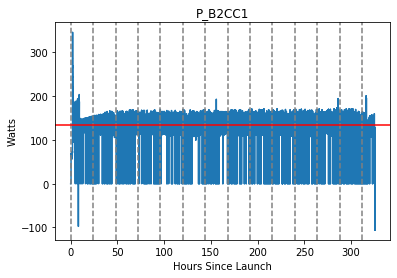

In [21]:
plt.plot(f['TIME'],P_B2CC1)
for d in np.arange(14):
    plt.axvline(d*24, linestyle='--',color='gray')
plt.axhline(133.6, linestyle='-',color='red')    
plt.title('P_B2CC1')  
plt.xlabel('Hours Since Launch')
plt.ylabel('Watts')
plt.show() 

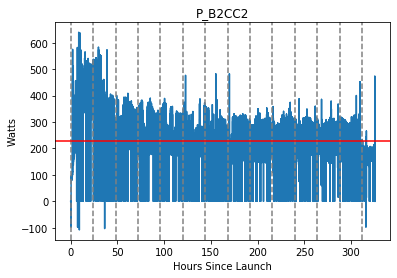

In [22]:
plt.plot(f['TIME'],P_B2CC2)
for d in np.arange(14):
    plt.axvline(d*24, linestyle='--',color='gray')
plt.axhline(229.6, linestyle='-',color='red')    
plt.title('P_B2CC2')  
plt.xlabel('Hours Since Launch')
plt.ylabel('Watts')
plt.show() 

I want to get average values for each dataset and then multiply them acordingly to geta  sigle value for power. 

In [23]:
Total_PowerB2CC=P_B2CC2+P_B2CC1
Total_PowerB2CC

array([   0.  ,    0.  ,    0.  , ..., -105.5 , -105.5 , -105.44],
      dtype=float16)

In [24]:
np.mean(Total_PowerB2CC)

363.2

In [25]:
np.max(Total_PowerB2CC)

871.5

In [26]:
np.min(Total_PowerB2CC)

-194.5

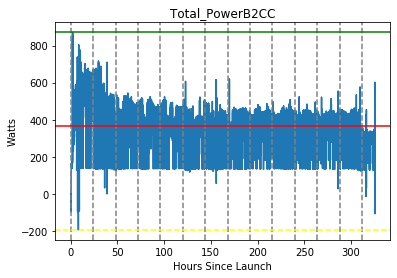

In [27]:
plt.plot(f['TIME'],Total_PowerB2CC)
for d in np.arange(14):
    plt.axvline(d*24, linestyle='--',color='gray')
plt.axhline(363.2, linestyle='-',color='red') 
plt.axhline(871.5, linestyle='-',color='green')  
plt.axhline(-194.5, linestyle='--',color='yellow') 
plt.rcParams["figure.figsize"] = (10,8)
plt.title('Total_PowerB2CC')  
plt.xlabel('Hours Since Launch')
plt.ylabel('Watts')
plt.show()

To get a smoother curve I am going to attempt to average over a minute 

In [28]:
f['TIME'].attrs.keys()

<KeysViewHDF5 ['Hz_sample_rate', 'unit']>

In [29]:
f['TIME'].attrs.get('Hz_sample_rate')

1.0

In [30]:
f['TIME'].attrs.get('unit')

'hr'

In [31]:
Toime=np.array(f['TIME'])

Bellow I am definning empty arrays in order to store results of following forloop. Minute will have less than 60 or equal to 60 entries. This allows us to average over every minute's worth of data. 

The function meany For every element in Total Power array add such element to the empty minute array. It will continue to append minutes with elements from Total Power until it reaches 60 elements (or whatever number we give 'res'. Once it reaches 'res' elements it will average those and send the average value to the empty averages array. Once this is done it wipes the minute array clean and the process repeats. 

In [32]:
def meany(res):
    minute=[]
    means=[]
    newtime=[]
    for i, e in enumerate(Total_PowerB2CC):
        minute.append(e)
        if len(minute) >= res:
            average=np.mean(minute)
            means.append(average)
            minute=[]
            newtime.append(Toime[i])
    return means, newtime

Bellow we are naming outputs of meany with different 'res'. That is we are taking interval averages for 600 seconds, 800 seconds, 1000 and so on. This will attempt to produce a cleaner graph for our power over time data.

In [33]:
mean1,time1=meany(600)
mean2,time2=meany(800)
mean3,time3=meany(1000)
mean4,time4=meany(1600)

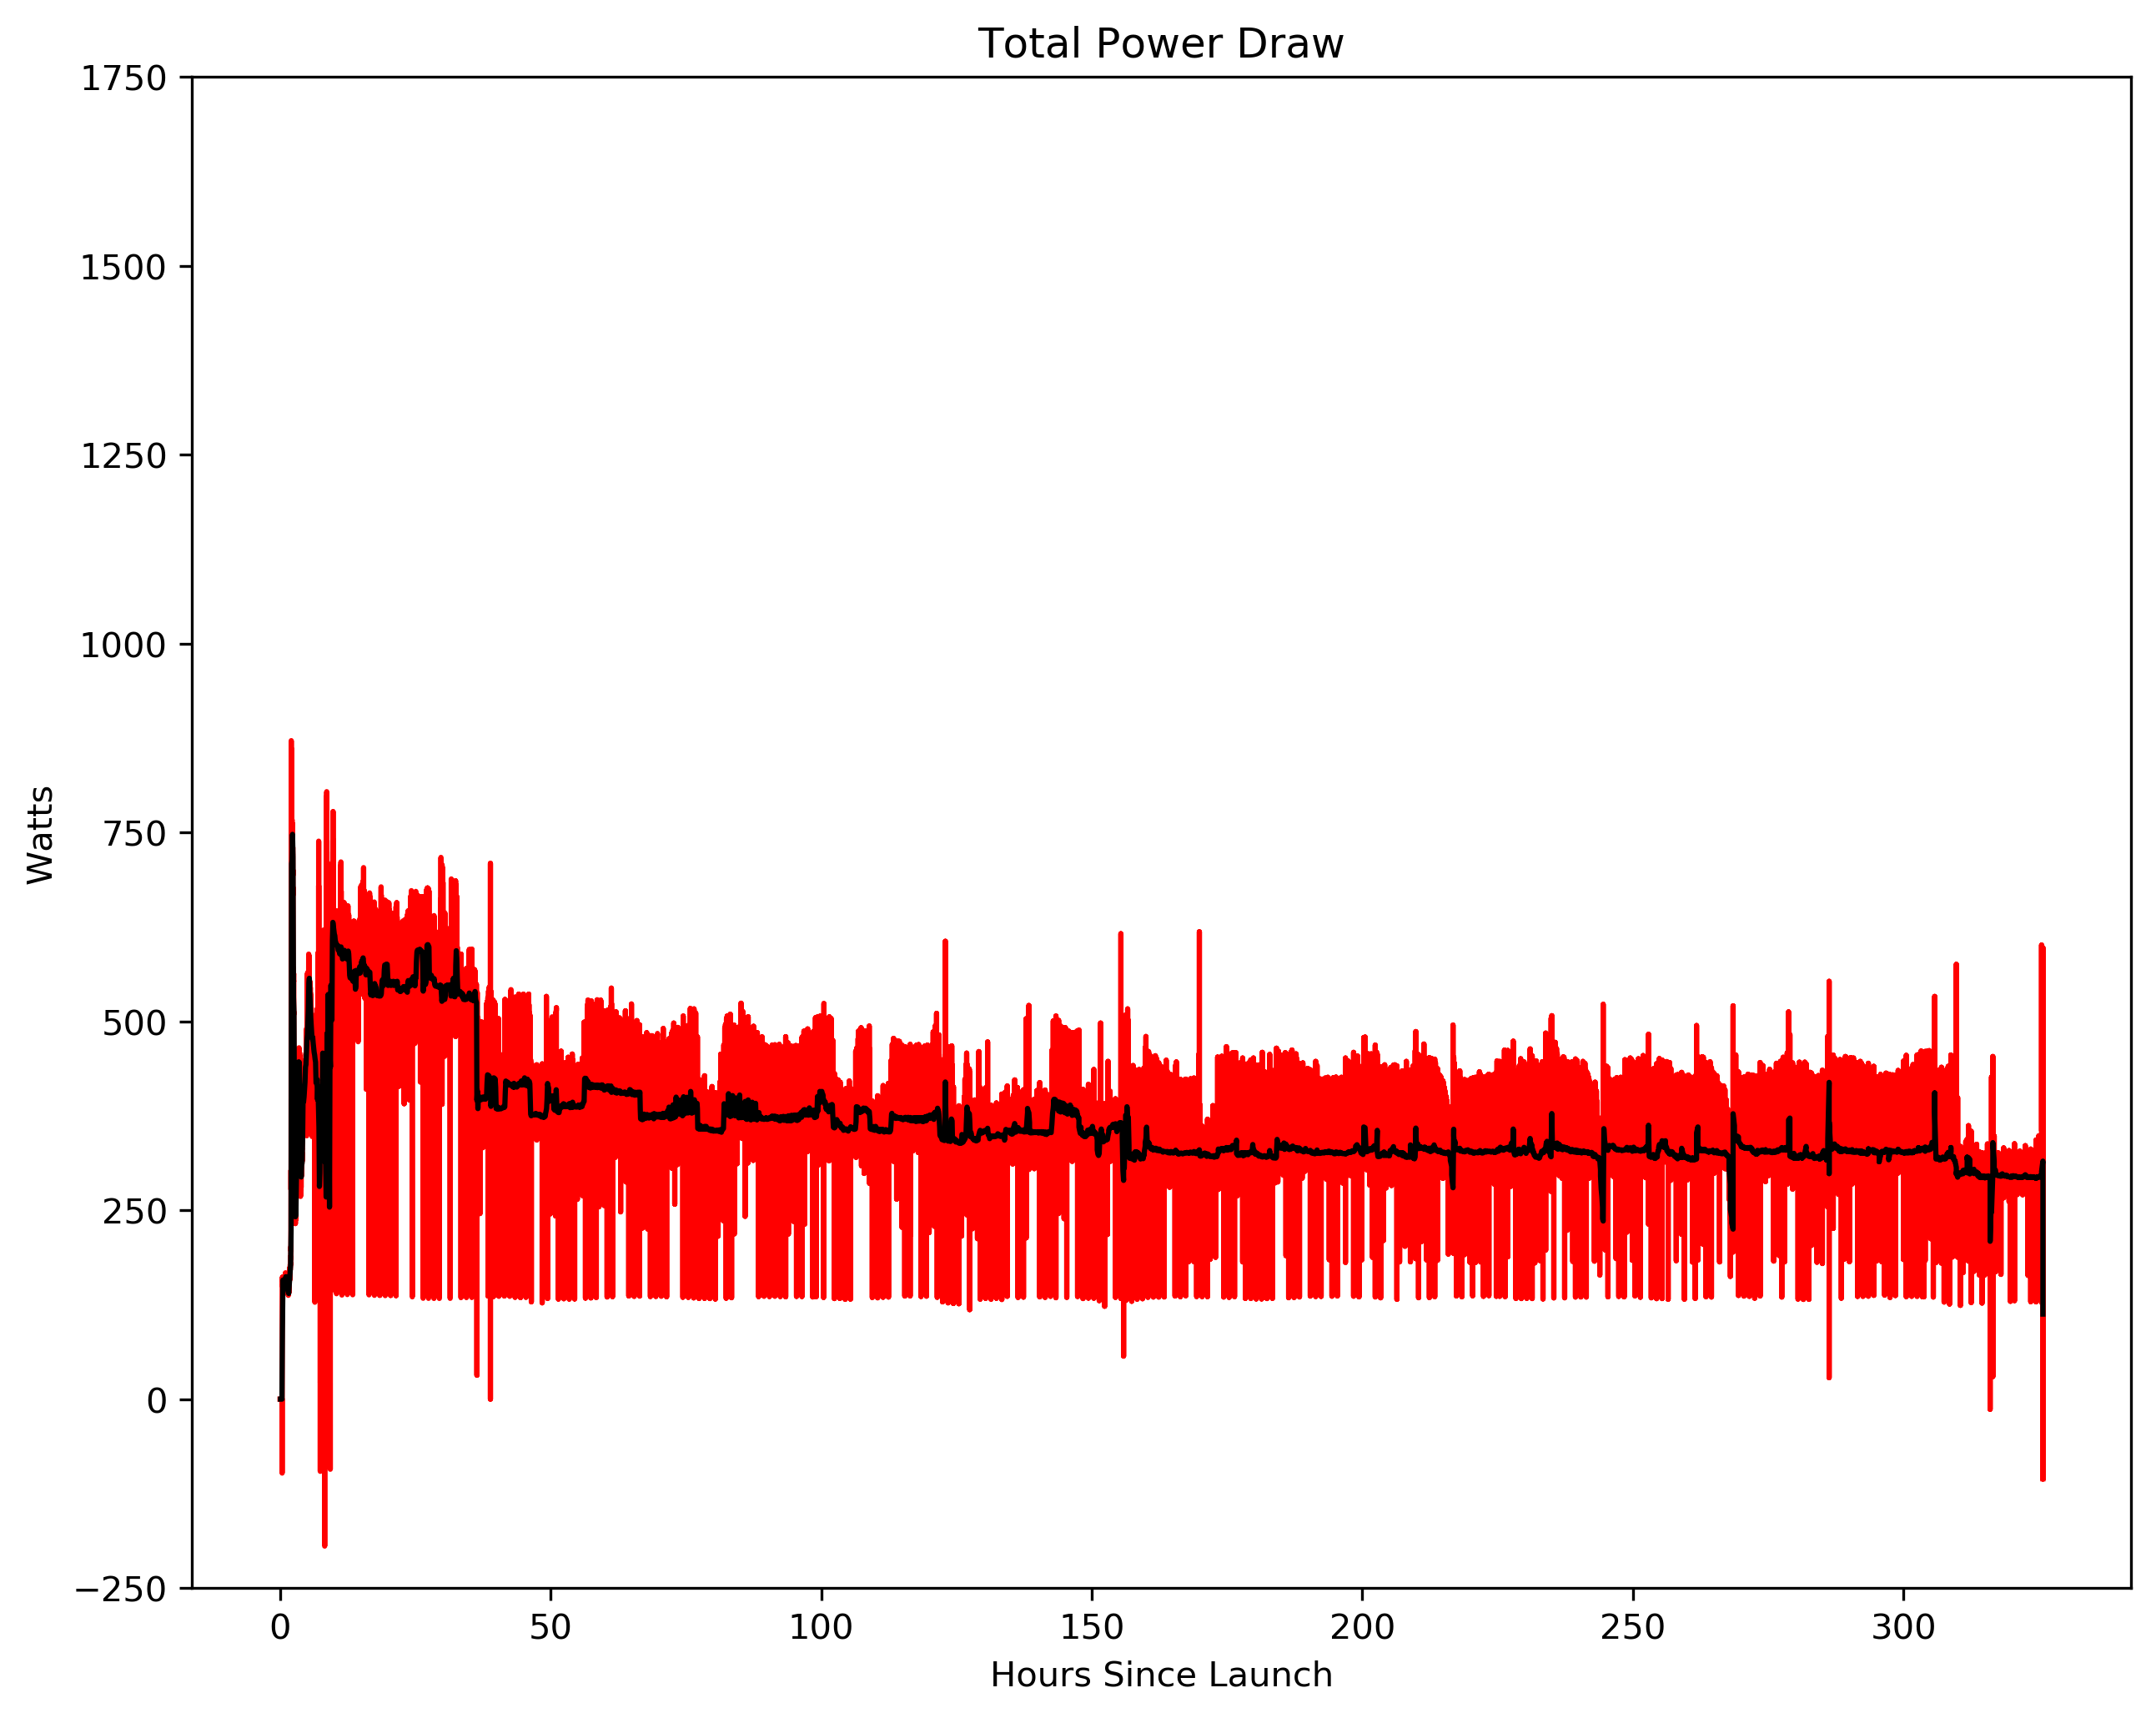

In [62]:
plt.figure(dpi=300)
plt.title('Total Power Draw')
plt.plot(Toime,Total_PowerB2CC, color='red')
plt.plot(time4, mean4, color='black')
plt.xlabel('Hours Since Launch')
plt.ylabel('Watts')
plt.ylim([-250,1750])
plt.show()

Trying to figure out where these readings are made: Whether the above is the power generated by the modules measured at the charge controller or if it is the power fed to the battery bank. 

In [35]:
f['V_TARG_CC1'].attrs.get('unit')

'V'

In [36]:
f['V_TARG_CC2'].attrs.get('unit')

'V'

In [37]:
V_TARCC2=f['V_TARG_CC2']
V_TARCC1=f['V_TARG_CC1']

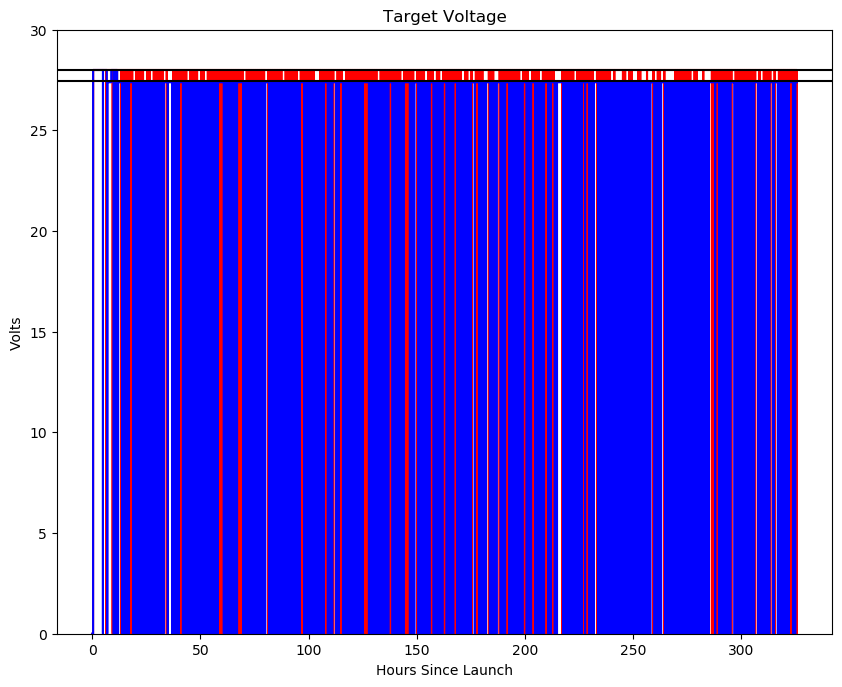

In [66]:
plt.figure(dpi=100)
plt.title('Target Voltage')
plt.plot(Toime,V_TARCC2, color='red', label='CC2')
plt.plot(Toime,V_TARCC1, color='blue', label='CC1')
plt.axhline(27.45, linestyle='-',color='black') 
plt.axhline(28, linestyle='-',color='black') 
plt.ylim([0,30])
plt.xlabel('Hours Since Launch')
plt.ylabel('Volts')
plt.show()

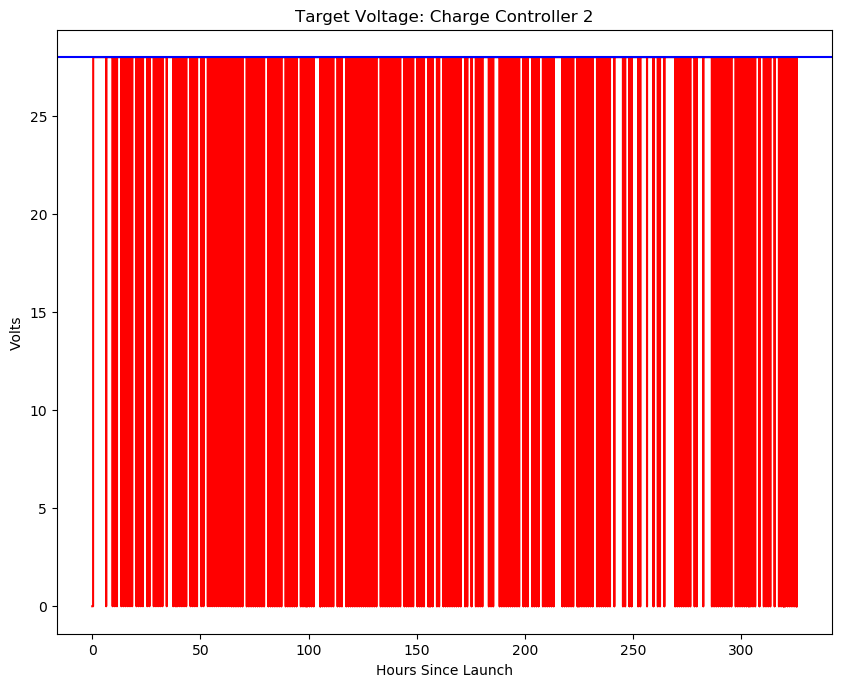

In [39]:
plt.figure(dpi=100)
plt.plot(Toime,V_TARCC2, color='red')
plt.title('Target Voltage: Charge Controller 2')
plt.axhline(28, linestyle='-',color='blue') 
plt.xlabel('Hours Since Launch')
plt.ylabel('Volts')
plt.show()

It seems like the target voltage for both charge controllers is about 28 V. 

The following ar the voltage across each array and the currents supplied by each array. 

In [46]:
Array1_Volt=f['V_ARR_CC1']
Array2_Volt=f['V_ARR_CC2']
Array1_Curr=f['I_ARR_CC1']
Array2_Curr=f['I_ARR_CC2']

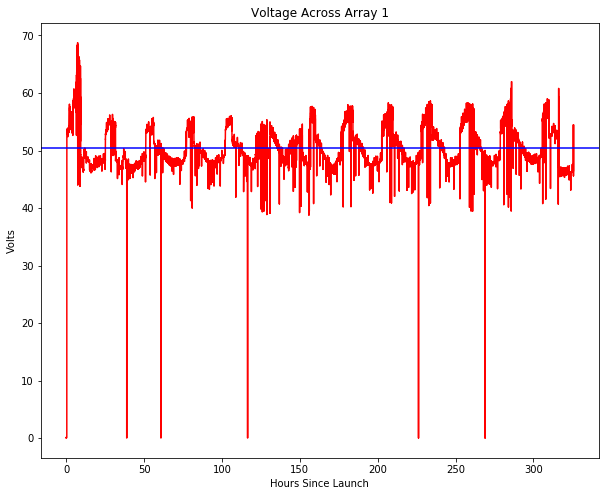

In [57]:
plt.figure()
plt.title('Voltage Across Array 1')
plt.plot(Toime,Array1_Volt, color='red')
plt.axhline(np.mean(Array1_Volt), linestyle='-',color='blue', label='Average Voltage') 
plt.xlabel('Hours Since Launch')
plt.ylabel('Volts')
plt.show()

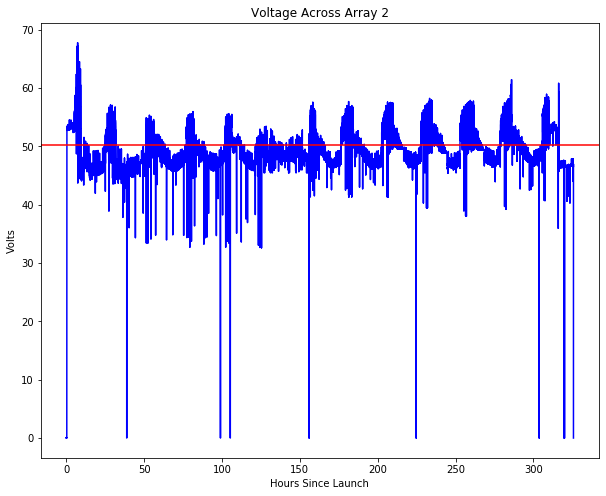

In [48]:
plt.figure()
plt.title('Voltage Across Array 2')
plt.plot(Toime,Array2_Volt, color='blue')
plt.axhline(np.mean(Array2_Volt), linestyle='-',color='red') 
plt.xlabel('Hours Since Launch')
plt.ylabel('Volts')
plt.show()

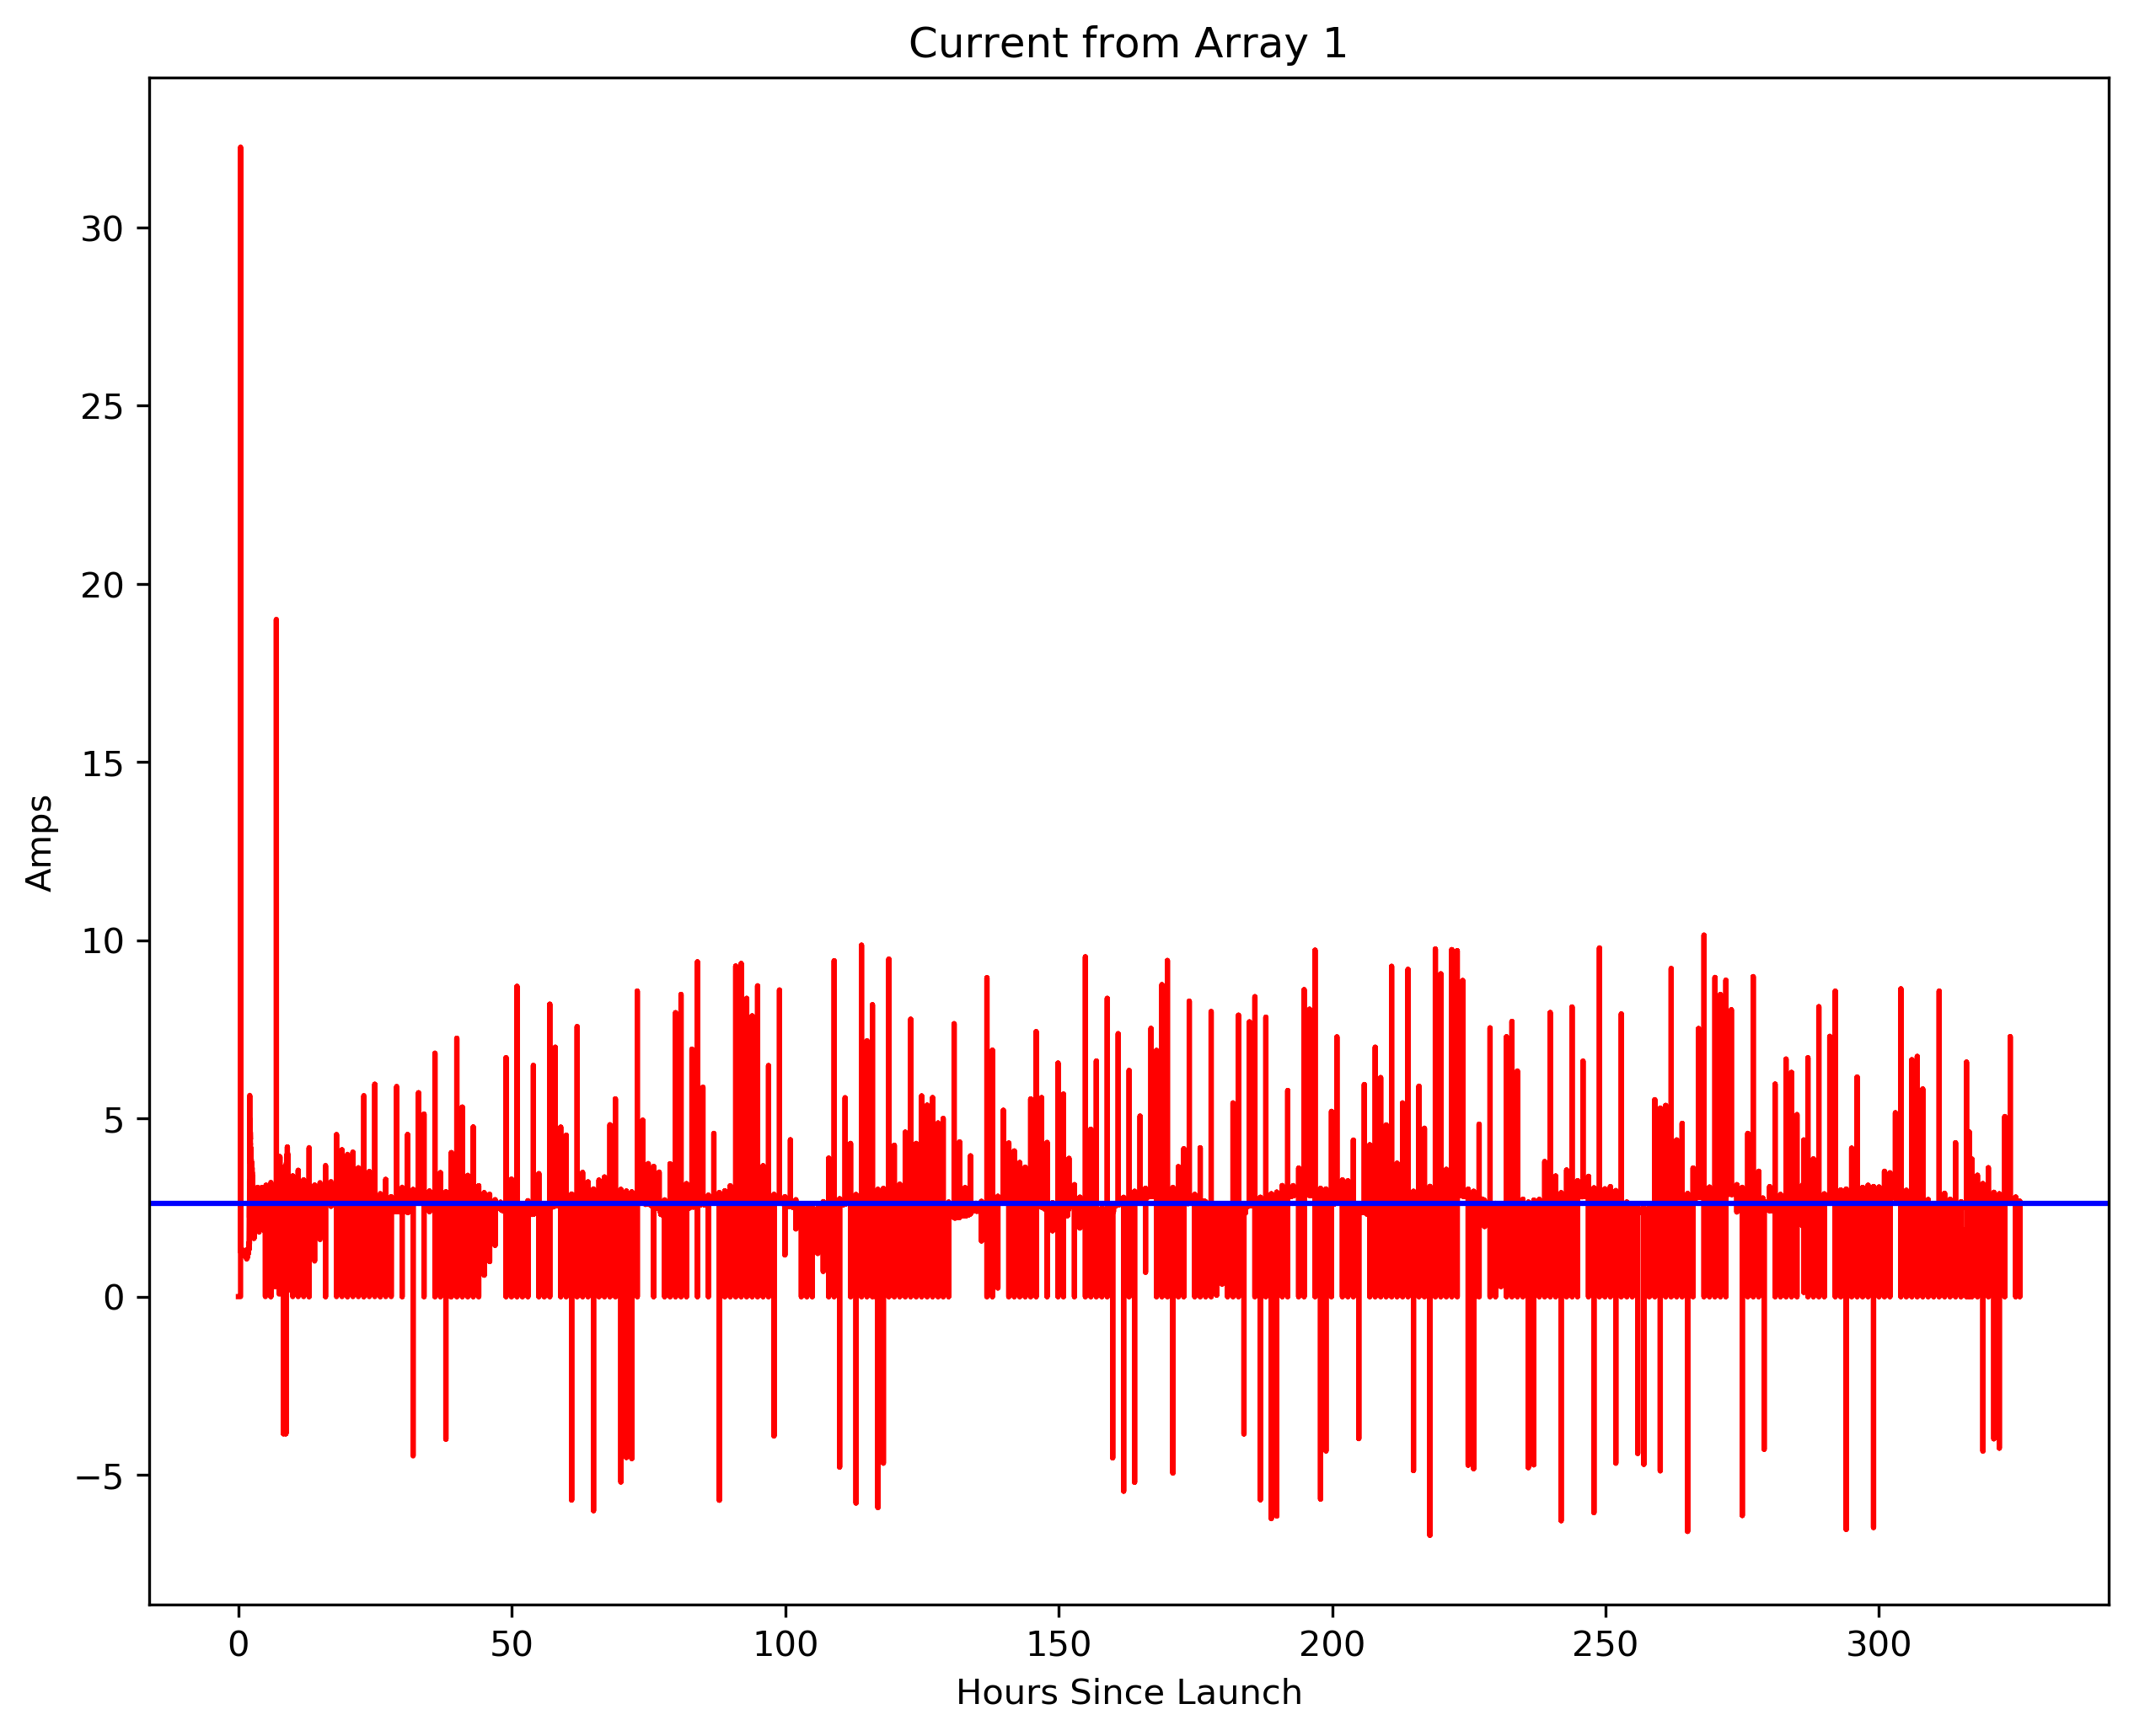

In [49]:
plt.figure(dpi=300)
plt.title('Current from Array 1')
plt.plot(Toime,Array1_Curr, color='red')
plt.axhline(np.mean(Array1_Curr), linestyle='-',color='blue') 
plt.xlabel('Hours Since Launch')
plt.ylabel('Amps')
plt.show()

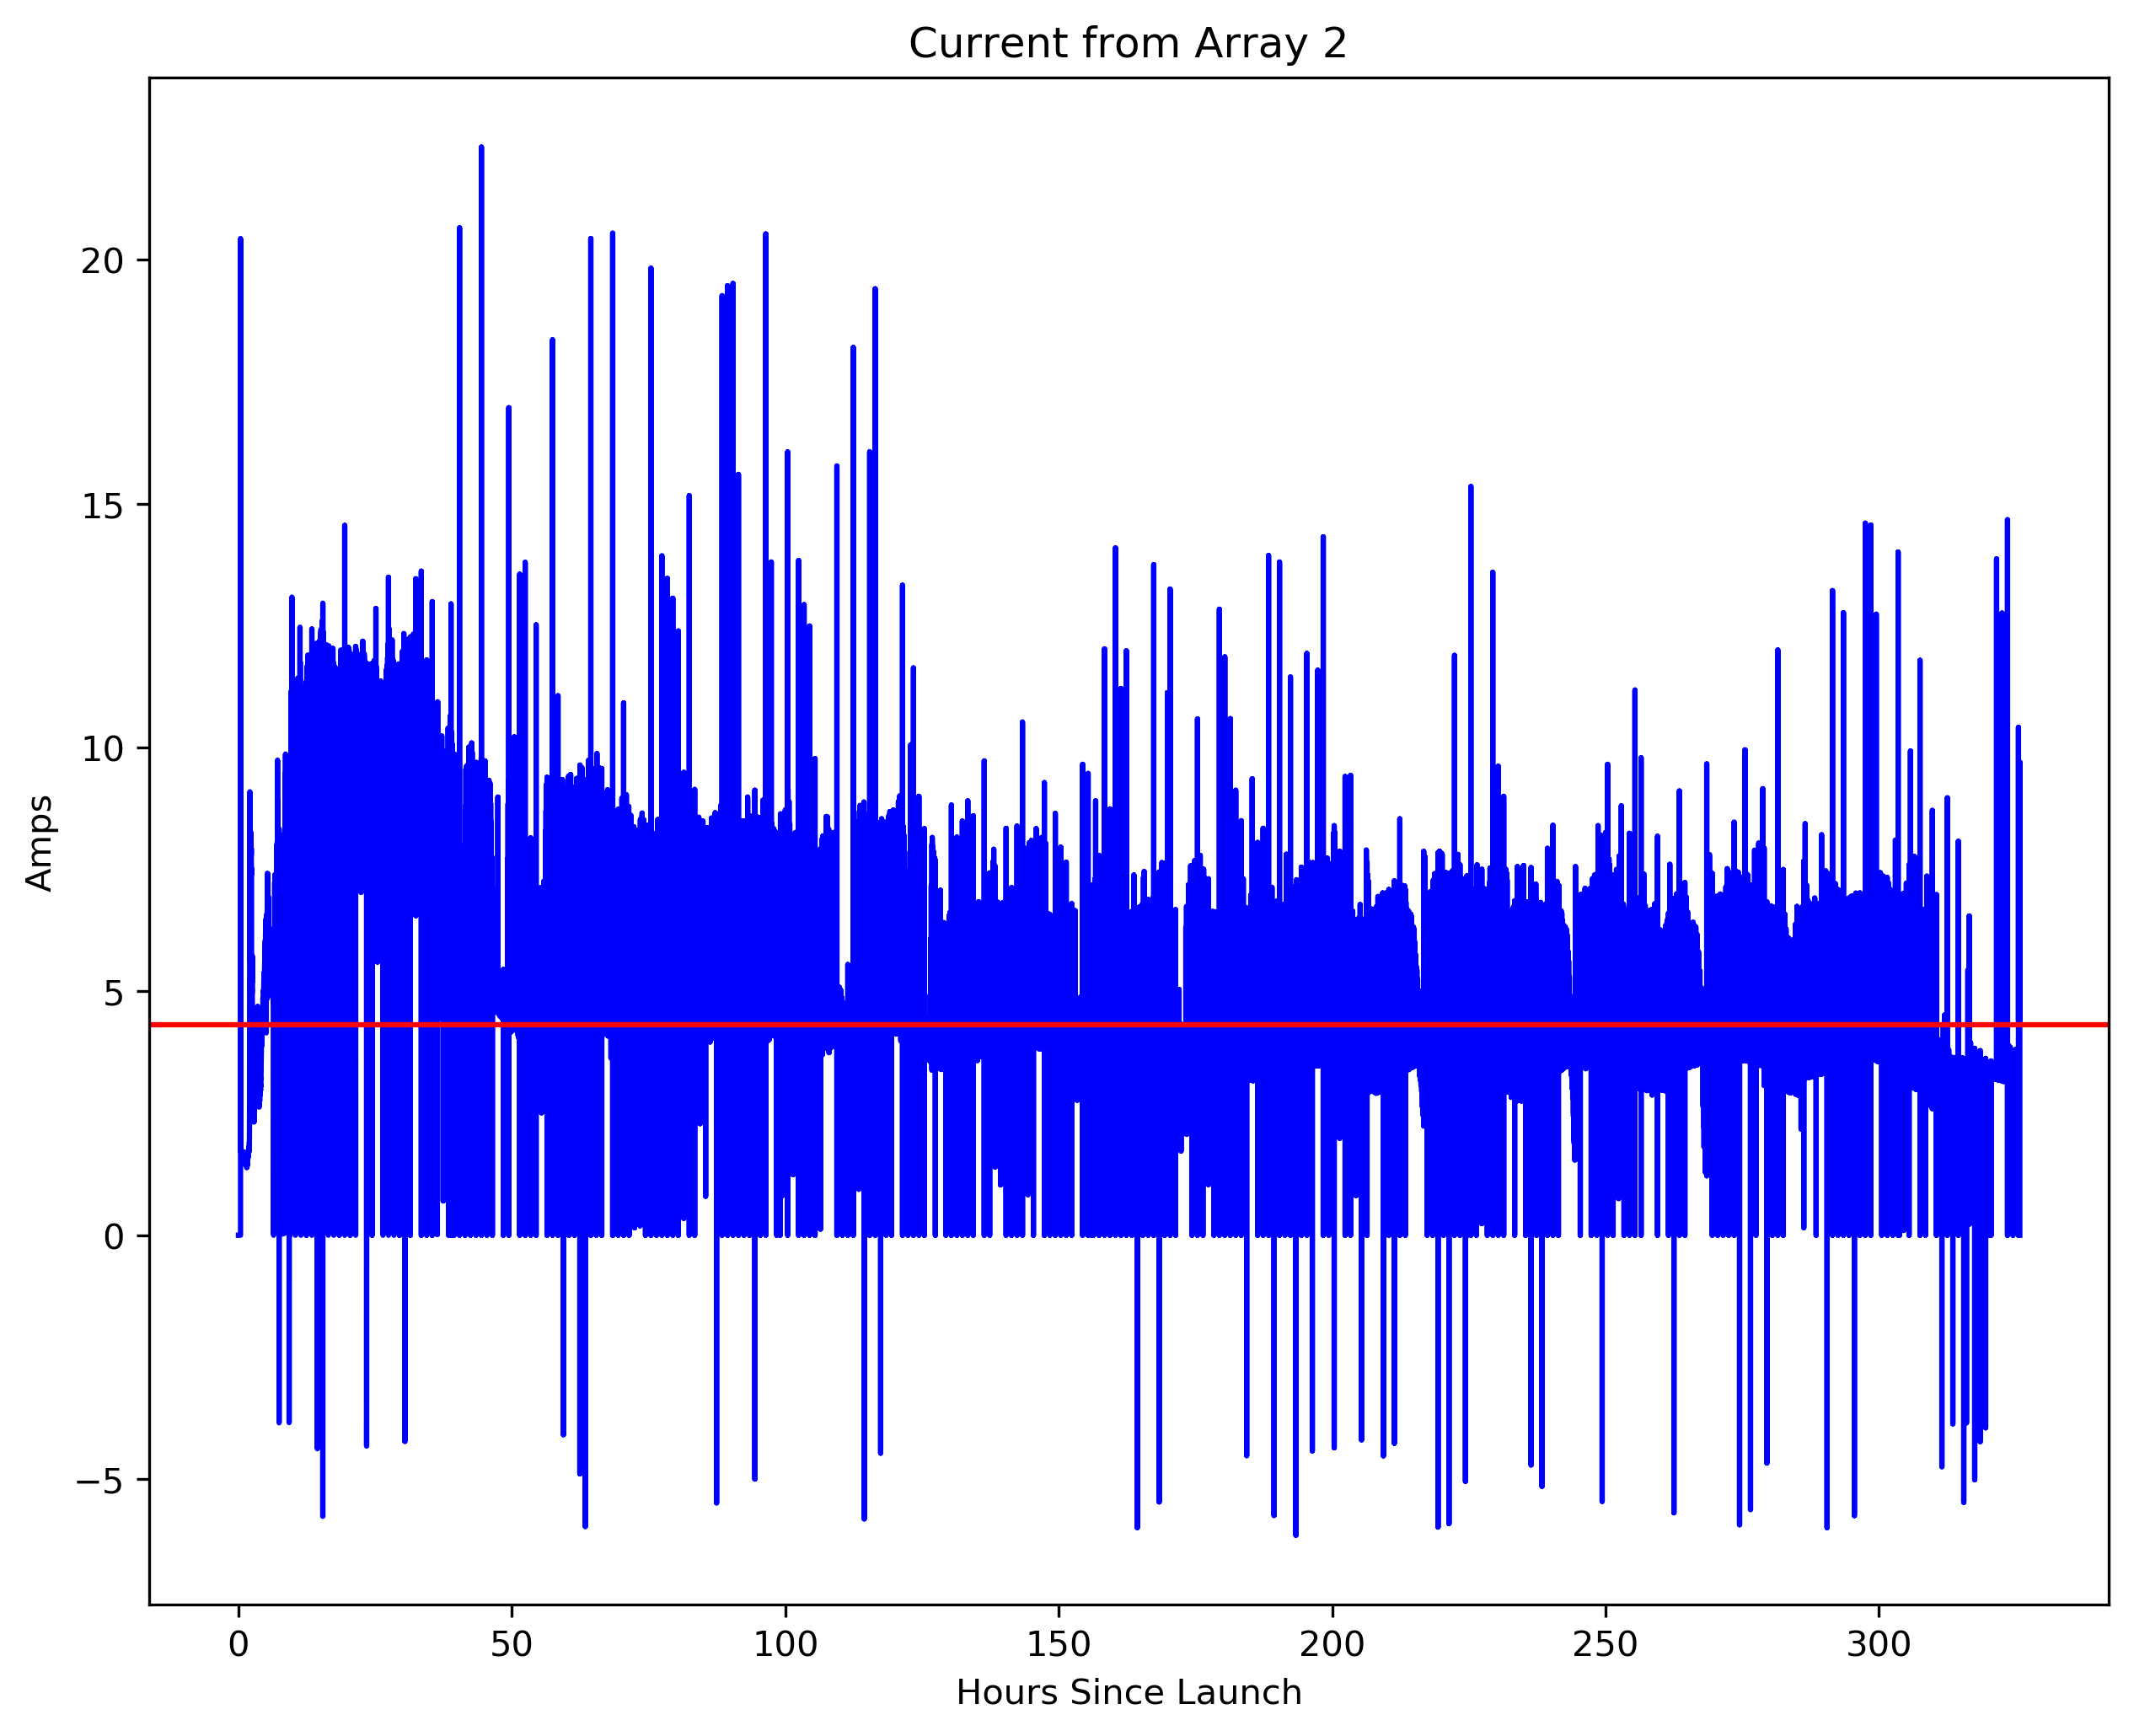

In [50]:
plt.figure(dpi=300)
plt.title('Current from Array 2')
plt.plot(Toime,Array2_Curr, color='blue')
plt.axhline(np.mean(Array2_Curr), linestyle='-',color='red') 
plt.xlabel('Hours Since Launch')
plt.ylabel('Amps')
plt.show()

Now I will perform P=IV in order to find the total power receieved by the arrays. 

In [51]:
Power_Receieved1 = np.multiply(Array1_Volt,Array1_Curr)
Power_Receieved2 = np.multiply(Array2_Volt,Array2_Curr)
Tot_Power_Received = Power_Receieved1 + Power_Receieved2

In [52]:
def recibo(bosa):
    minutico=[]
    media=[]
    nuevostiempo=[]
    for i, e in enumerate(Tot_Power_Received):
        minutico.append(e)
        if len(minutico) >= bosa:
            promedias=np.mean(minutico)
            media.append(promedias)
            minutico=[]
            nuevostiempo.append(Toime[i])
    return media, nuevostiempo

In [53]:
media1, nuevostiempo1 = recibo(300)
media2, nuevostiempo2 = recibo(400)
media3, nuevostiempo3 = recibo(500)
media4, nuevostiempo4 = recibo(1000)

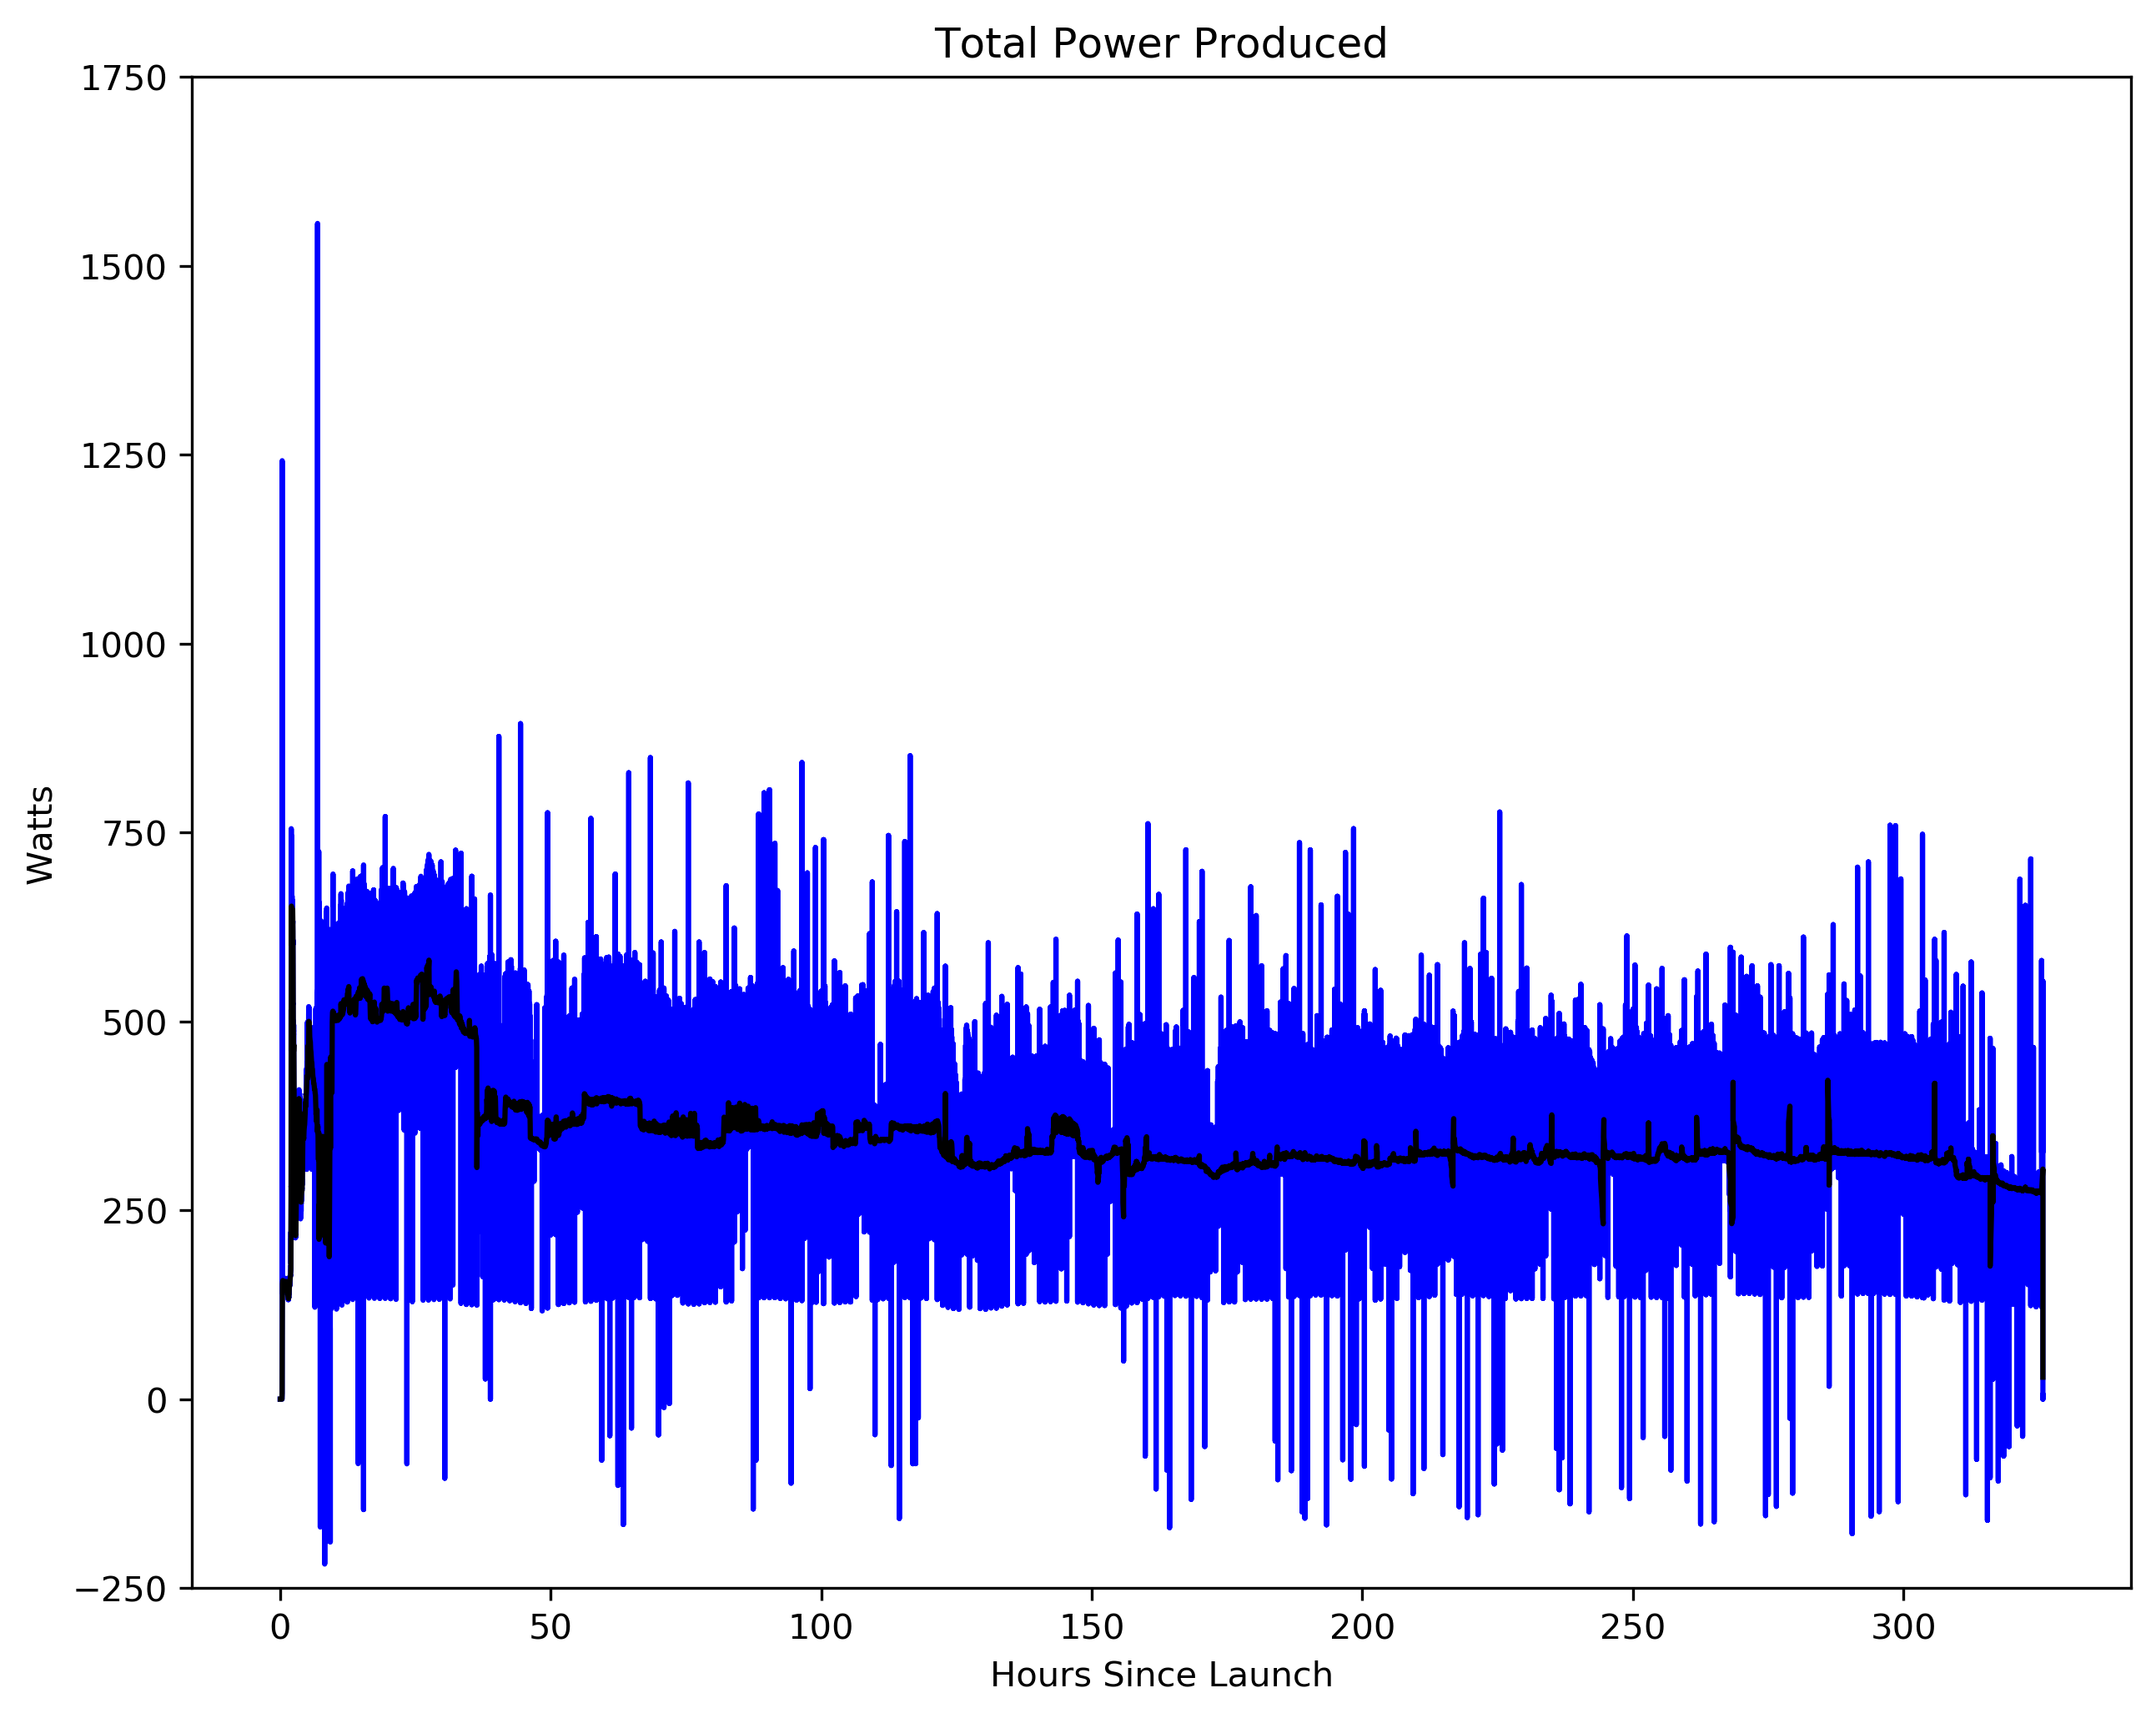

In [63]:
plt.figure(dpi=300)
plt.title('Total Power Produced')
plt.plot(Toime,Tot_Power_Received, color='blue')
plt.plot(nuevostiempo4, media4,  linestyle='-',color='black') 
plt.ylim([-250,1750])
plt.xlabel('Hours Since Launch')
plt.ylabel('Watts')
plt.show()

In [55]:
f['VT_1_BAT'].attrs.get('unit')

'V'

I am unsure what the bellow variables are. The values seem super low but they seem to follow the same pattern of very high draw at the begining of the flight as the Total Power Draw graph. 


In [67]:
Volt_Terminal_B1=f['VT_1_BAT']
Volt_Terminal_B2=f['VT_2_BAT']

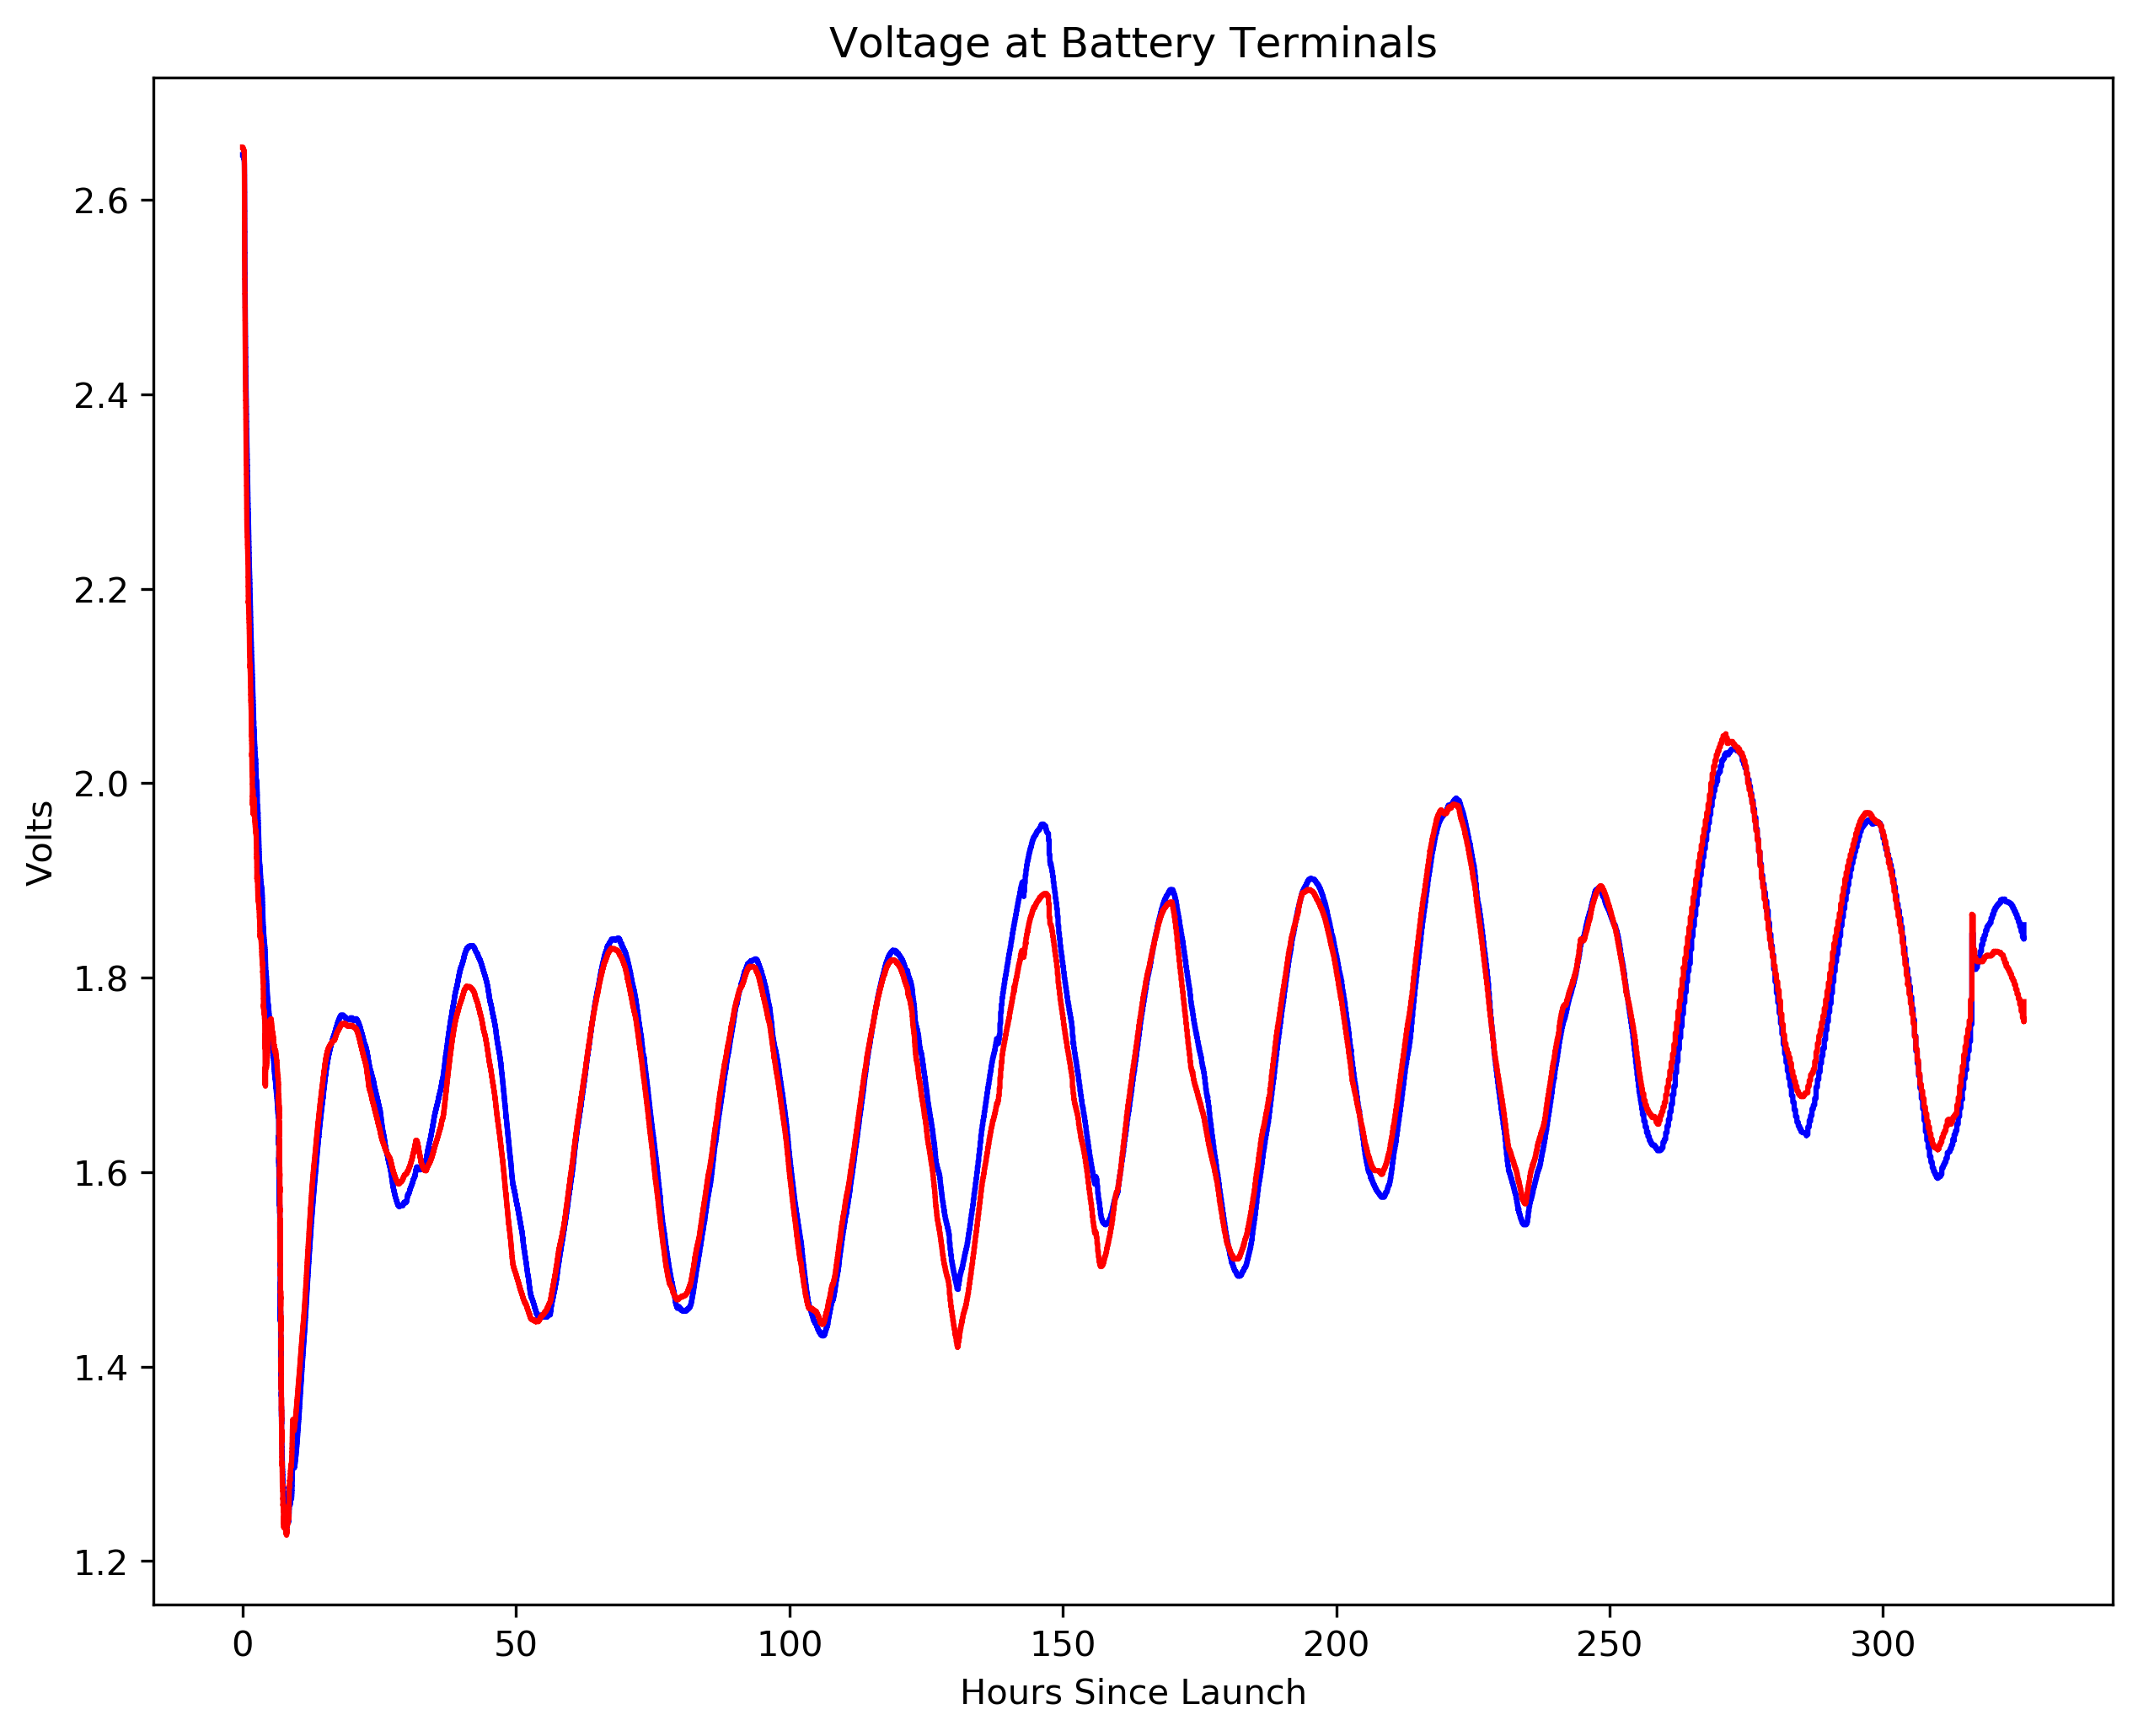

In [68]:
plt.figure(dpi=300)
plt.title('Voltage at Battery Terminals')
plt.plot(Toime,Volt_Terminal_B1, color='blue', label='Batt 1')
plt.plot(Toime,Volt_Terminal_B2, color='red', label='Batt 2')
#plt.ylim([-250,1750])
plt.xlabel('Hours Since Launch')
plt.ylabel('Volts')
plt.show()